<a href="https://colab.research.google.com/github/Anavi07/AudioSpotting/blob/main/Arabic_MS_All_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kagglehub

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
!kaggle datasets download -d abdulkaderghandoura/arabic-speech-commands-dataset

Dataset URL: https://www.kaggle.com/datasets/abdulkaderghandoura/arabic-speech-commands-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 98% 323M/330M [00:02<00:00, 120MB/s]
100% 330M/330M [00:03<00:00, 115MB/s]


In [5]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = "/content/arabic-speech-commands-dataset.zip"

# Directory where you want to extract the files
extract_dir = "/content/arabic_speech_dataset"

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")


Files extracted to: /content/arabic_speech_dataset


In [6]:
# Paths
dataset_dir = '/content/arabic_speech_dataset/dataset/dataset'  # Path to the dataset folder containing digit folders
output_dir = '/content/drive/MyDrive/arabic'  # Path to save processed data

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [7]:
# PROCESSING
# Feature extraction methods

# def CalculateZeroCrossingRate(file_location):
#     y, sr = librosa.load(file_location)
#     zCross = librosa.feature.zero_crossing_rate(y=y)
#     dim = (32, 32)
#     resized = cv2.resize(zCross, dim, interpolation = cv2.INTER_AREA)
#     return resized

def CalculateMelSpectrogram(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.melspectrogram(y=y, sr=sr)
    melSpec_dB = librosa.power_to_db(melSpec)
    dim = (32, 32)
    resized = cv2.resize(melSpec_dB, dim, interpolation = cv2.INTER_AREA)
    return resized


def CalculateMFCC(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.mfcc(y=y, sr=sr)
    dim = (32, 32)
    resized = cv2.resize(melSpec, dim, interpolation = cv2.INTER_AREA)
    return resized



In [8]:
cd /content

/content


In [9]:
'''for i in range(10):
  j = '/content/dataset'
  print(os.listdir(j))
  for k in os.listdir(j):
    print(k)
    if ".DS_" in k:
      continue

    for t in os.listdir(j+"/"+k):
      #print("path = ", os.listdir(j+"/"+k))
      if ".DS_" in k:
        continue
      print(t.split("WA")[1].split(".")[0])
      #print(t.split("D")[1][0])
      break
    break
  break '''

'for i in range(10):\n  j = \'/content/dataset\'\n  print(os.listdir(j))\n  for k in os.listdir(j):\n    print(k)\n    if ".DS_" in k:\n      continue\n\n    for t in os.listdir(j+"/"+k):\n      #print("path = ", os.listdir(j+"/"+k))\n      if ".DS_" in k:\n        continue\n      print(t.split("WA")[1].split(".")[0])\n      #print(t.split("D")[1][0])\n      break\n    break\n  break '

In [10]:
import os
import numpy as np

# Paths
main_dir = "/content/arabic_speech_dataset/dataset/dataset"  # Path to the main dataset folder
files_path = "/content/drive/MyDrive/arabic"  # Path to save processed data

# Ensure output directory exists
if not os.path.exists(files_path):
    os.makedirs(files_path)

# Helper function to convert folder names to labels
def folder_to_label(folder_name):
    arabic_to_english = {
        "zero": 0,
        "one": 1,
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "seven": 7,
        "eight": 8,
        "nine": 9,
    }
    return arabic_to_english.get(folder_name.lower())

# Initialize data containers
x = []
y = []

# Loop through each folder in the main directory
for label_dir in os.listdir(main_dir):
    label_path = os.path.join(main_dir, label_dir)

    # Skip non-digit folders and non-directories
    label = folder_to_label(label_dir)
    if label is None or not os.path.isdir(label_path):
        continue

    # Process audio files within the label directory
    for file_name in os.listdir(label_path):
        if not file_name.endswith(".wav"):  # Skip non-wav files
            continue

        file_path = os.path.join(label_path, file_name)

        try:
            # Extract Mel Spectrogram features
            x.append(CalculateMelSpectrogram(file_path))  # Replace with your feature extraction function
            y.append(label)  # Use folder name as the label
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Convert data to NumPy arrays
x = np.array(x)
y = np.array(y)

# Verify processed data
if x.size == 0 or y.size == 0:
    raise ValueError("No data was processed. Check dataset structure and feature extraction.")

# Save processed data
np.save(os.path.join(files_path, "X_melspectrogram.npy"), x)
np.save(os.path.join(files_path, "Y_melspectrogram.npy"), y)

print(f"Processing completed. Processed data saved in {files_path}.")


Processing completed. Processed data saved in /content/drive/MyDrive/arabic.


In [12]:
#load files
files_path = "/content/drive/MyDrive/arabic"  # Save processed data

x_melspectrogram = np.load(files_path+"/X_melspectrogram.npy", allow_pickle=True)
# x_zero_crossing_rate = np.load(files_path+"/X_zero_crossing_rate.npy", allow_pickle=True)
# x_mfcc = np.load(files_path+"/X_mfcc.npy", allow_pickle=True)
y_melspectrogram = np.load(files_path+"/Y_melspectrogram.npy", allow_pickle=True)
# y_zero_crossing_rate = np.load(files_path+"/y_zero_crossing_rate.npy", allow_pickle=True)
# y_mfcc = np.load(files_path+"/Y_mfcc.npy", allow_pickle=True)

In [ ]:
# #Split data into train and test

# from sklearn.model_selection import train_test_split
# x = x_mfcc
# y = y_mfcc

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_mfcc_train",x_train)
# np.save(files_path+"/y_mfcc_train",y_train)
# np.save(files_path+"/x_mfcc_test",x_test)
# np.save(files_path+"/y_mfcc_test",y_test)

In [13]:
from sklearn.model_selection import train_test_split
x = x_melspectrogram
y = y_melspectrogram

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
np.save(files_path+"/x_melspectrogram_train",x_train)
np.save(files_path+"/y_melspectrogram_train",y_train)
np.save(files_path+"/x_melspectrogram_test",x_test)
np.save(files_path+"/y_melspectrogram_test",y_test)

In [ ]:

# from sklearn.model_selection import train_test_split
# x = x_zero_crossing_rate
# y = y_zero_crossing_rate

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_zero_crossing_rate_train",x_train)
# np.save(files_path+"/y_zero_crossing_rate_train",y_train)
# np.save(files_path+"/x_zero_crossing_rate_test",x_test)
# np.save(files_path+"/y_zero_crossing_rate_test",y_test)

In [15]:
import tensorflow as tf
import numpy as np

files_path = "/content/drive/MyDrive/arabic"

features = ['melspectrogram', 'mfcc', 'zero_crossing_rate']

x_train = np.load(files_path+"/x_{}_train.npy".format(features[0]), allow_pickle=True)
y_train = np.load(files_path+"/y_{}_train.npy".format(features[0]), allow_pickle=True)

x_test = np.load(files_path+"/x_{}_test.npy".format(features[0]),allow_pickle=True)
y_test = np.load(files_path+"/y_{}_test.npy".format(features[0]),allow_pickle=True)

In [16]:
print(np.unique(y_melspectrogram))

[0 1 2 3 4 5 6 7 8 9]


In [17]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))

## CNN

In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
def GetCNN():
  model = models.Sequential()

  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Dropout(0.1))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))# fully connected
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.1))

  model.add(layers.Dense(10,activation='softmax', use_bias=True))
  return model

In [19]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y = label_as_binary.fit_transform(y_train)
test_y = label_as_binary.fit_transform(y_test)

In [20]:
# Normalise
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Ensure consistency by fitting the LabelBinarizer only once on all possible labels
label_as_binary = LabelBinarizer()
label_as_binary.fit(np.unique(y_melspectrogram))  # Fit on all unique labels (0–9)

# Transform train and test labels
train_y = label_as_binary.transform(y_train)
test_y = label_as_binary.transform(y_test)

# Verify shapes
print("X train shape = ", x_train.shape)
print("y train shape = ", train_y.shape)
print("X test shape = ", x_test.shape)
print("y test shape = ", test_y.shape)

# CNN Model
cnn_model = GetCNN()
print(cnn_model.summary())

cnn_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
)

# Define save path for the best model
save_path = '/content/drive/MyDrive/saved files/arabic/models'
callbacks = ModelCheckpoint(
    save_path + "/melspectrogram_model_.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model
history = cnn_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

# Evaluate the model
print("Test Accuracy is ", cnn_model.evaluate(x_test, test_y)[1])


X train shape =  (2400, 32, 32, 1)
y train shape =  (2400, 10)
X test shape =  (600, 32, 32, 1)
y test shape =  (600, 10)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3857 - loss: 1.8145
Epoch 1: val_accuracy improved from -inf to 0.10833, saving model to /content/drive/MyDrive/saved files/arabic/models/melspectrogram_model_.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.3914 - loss: 1.7975 - val_accuracy: 0.1083 - val_loss: 6.3863
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8619 - loss: 0.3961
Epoch 2: val_accuracy improved from 0.10833 to 0.12500, saving model to /content/drive/MyDrive/saved files/arabic/models/melspectrogram_model_.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8626 - loss: 0.3940 - val_accuracy: 0.1250 - val_loss: 4.4531
Epoch 3/50
32/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9352 - loss: 0.1970 
Epoch 3: val_accuracy improved from 0.12500 to 0.16250, saving model to /content/drive/MyDrive/saved files/arabic/models/melspectrogram_model_.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9350 - l

In [22]:
# Load the saved model
cnn_model = tf.keras.models.load_model(save_path + "/melspectrogram_model_.keras")

# Evaluate on the training set
train_metrics = cnn_model.evaluate(x_train, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = cnn_model.evaluate(x_test, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = cnn_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - loss: 0.0154
Train Loss: 0.021630140021443367, Train Accuracy: 0.9933333396911621
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9611 - loss: 0.2834
Test Loss: 0.1813262701034546, Test Accuracy: 0.971666693687439
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.9860 - loss: 0.0386
Validation Loss: 0.04053199663758278, Validation Accuracy: 0.987500011920929


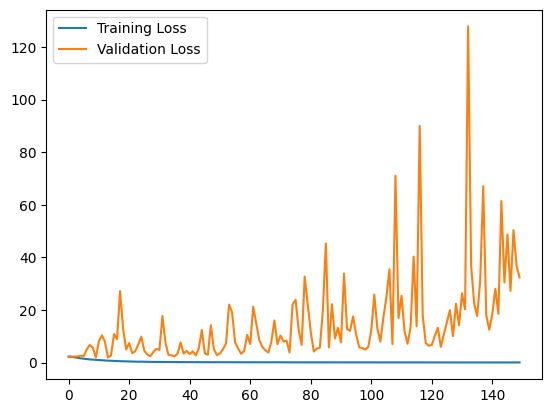

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()


In [ ]:
# import keras
# zcr_model = keras.models.load_model(save_path+"/{}_model_.keras".format(features[0]))
# print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0745 - loss: 33.0289
Test Accuracy is  0.08357183635234833


## GoogleNet

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetGoogleNet():
    input_layer = layers.Input(shape=(32, 32, 1))

    # First Convolutional Block
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    # Inception Module 1
    branch1 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)

    branch2 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    branch2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    branch3 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(branch4)

    x = layers.Concatenate()([branch1, branch2, branch3, branch4])
    x = layers.BatchNormalization()(x)

    # Inception Module 2
    branch1 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)

    branch2 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch3 = layers.Conv2D(128, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(branch4)

    x = layers.Concatenate()([branch1, branch2, branch3, branch4])
    x = layers.BatchNormalization()(x)

    # Global Average Pooling + Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model


In [24]:
# Model Compilation and Training
save_path = '/content/drive/MyDrive/saved files/arabic/models'

cnn_model = GetGoogleNet()
print(cnn_model.summary())

cnn_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
)

from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/googleNet_ms_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

print("X train shape = ", x_train.shape)
print("y train shape = ", train_y.shape)

history = cnn_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 64)     │            640 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 16, 16, 64)     │            256 │ max_pooling2d_3[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 16, 16, 64)     │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 64)     │         51,264 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 192)    │              0 │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_6[0][0],        │
│                           │                        │                │ conv2d_8[0][0],        │
│                           │                        │                │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 16, 16, 192)    │            768 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 16, 16, 64)     │         12,352 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 16, 16, 64)     │         12,352 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5      

 Total params: 542,218 (2.07 MB)

 Trainable params: 540,938 (2.06 MB)

 Non-trainable params: 1,280 (5.00 KB)

None
X train shape =  (2400, 32, 32, 1)
y train shape =  (2400, 10)
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.2600 - loss: 2.0583
Epoch 1: val_accuracy improved from -inf to 0.10833, saving model to /content/drive/MyDrive/saved files/arabic/models/googleNet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 391ms/step - accuracy: 0.2632 - loss: 2.0492 - val_accuracy: 0.1083 - val_loss: 3.7232
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6535 - loss: 1.0114
Epoch 2: val_accuracy did not improve from 0.10833
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6555 - loss: 1.0059 - val_accuracy: 0.1083 - val_loss: 18.4990
Epoch 3/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8464 - loss: 0.5110
Epoch 3: val_accuracy did not improve from 0.10833
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8474 - loss: 0.5071 - val_accuracy: 0.1083 - val_loss: 20.8181
Epoch 4/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9242 - loss: 

In [25]:
# Reshape the train and test data back to (32, 32, 1)
x_train_reshaped = tf.image.resize(x_train, (32, 32))  # Resize to match original input
x_test_reshaped = tf.image.resize(x_test, (32, 32))    # Resize to match original input

# Add grayscale channel
x_train_reshaped = tf.expand_dims(x_train_reshaped, axis=-1)
x_test_reshaped = tf.expand_dims(x_test_reshaped, axis=-1)

In [26]:
# Load the saved model
googleNet_model = tf.keras.models.load_model(save_path + "/googleNet_ms_model.keras")

# Evaluate on the training set
train_metrics = googleNet_model.evaluate(x_train_reshaped, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = googleNet_model.evaluate(x_test_reshaped, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_reshaped[-int(0.1 * len(x_train_reshaped)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = googleNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9702 - loss: 0.1789
Train Loss: 0.1620882898569107, Train Accuracy: 0.9708333611488342
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9391 - loss: 0.2601
Test Loss: 0.29640311002731323, Test Accuracy: 0.9350000023841858
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.9632 - loss: 0.1636
Validation Loss: 0.24489447474479675, Validation Accuracy: 0.9541666507720947


## LeNet

In [27]:
def GetLeNet():
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1), padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Layer 2
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes

    return model


In [28]:
save_path = '/content/drive/MyDrive/saved files/arabic/models'

# Instantiate the model
lenet_model = GetLeNet()

# Compile the model
lenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(lenet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(save_path + "/lenet_ms_model.keras", monitor='val_accuracy',
                            mode='max', save_best_only=True, verbose=1)

# Train the AlexNet model
history = lenet_model.fit(
    x_train, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1880 - loss: 2.2822
Epoch 1: val_accuracy improved from -inf to 0.30417, saving model to /content/drive/MyDrive/saved files/arabic/models/lenet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.1896 - loss: 2.2808 - val_accuracy: 0.3042 - val_loss: 2.0198
Epoch 2/50
22/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3629 - loss: 1.8403 
Epoch 2: val_accuracy improved from 0.30417 to 0.54167, saving model to /content/drive/MyDrive/saved files/arabic/models/lenet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3936 - loss: 1.7676 - val_accuracy: 0.5417 - val_loss: 1.3272
Epoch 3/50
22/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5933 - loss: 1.1742 
Epoch 3: val_accuracy improved from 0.54167 to 0.67500, saving model to /content/drive/MyDrive/saved files/arabic/models/lenet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6065 - loss: 1.1426 - val_accura

In [29]:
# Load the saved model
leNet_model = tf.keras.models.load_model(save_path + "/lenet_ms_model.keras")

# Evaluate on the training set
train_metrics = leNet_model.evaluate(x_train_reshaped, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = leNet_model.evaluate(x_test_reshaped, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_reshaped[-int(0.1 * len(x_train_reshaped)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = leNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9974 - loss: 0.0182
Train Loss: 0.025402309373021126, Train Accuracy: 0.9945833086967468
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9237 - loss: 0.2045
Test Loss: 0.22439005970954895, Test Accuracy: 0.9300000071525574
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9567 - loss: 0.1159
Validation Loss: 0.08093532174825668, Validation Accuracy: 0.9708333611488342


## MobileNetV2

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocess the data to match MobileNet input requirements
import numpy as np
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Define the MobileNet model
def GetMobileNet():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None  # Training from scratch for audio classification
    )

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')  # Adjust for 10-class classification
    ])

    return model


In [31]:
save_path = '/content/drive/MyDrive/saved files/arabic/models'

# Instantiate the model
mobileNet_model = GetMobileNet()

# Compile the model
mobileNet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(mobileNet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/mobileNet_ms_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the MobileNet model
history = mobileNet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_32 (Functional)     │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 2,389,130 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.1154 - loss: 2.6535
Epoch 1: val_accuracy improved from -inf to 0.09583, saving model to /content/drive/MyDrive/saved files/arabic/models/mobileNet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 73s 749ms/step - accuracy: 0.1156 - loss: 2.6487 - val_accuracy: 0.0958 - val_loss: 2.3024
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1568 - loss: 2.2593
Epoch 2: val_accuracy improved from 0.09583 to 0.10417, saving model to /content/drive/MyDrive/saved files/arabic/models/mobileNet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1572 - loss: 2.2591 - val_accuracy: 0.1042 - val_loss: 2.3024
Epoch 3/50
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2208 - loss: 2.1348
Epoch 3: val_accuracy did not improve from 0.10417
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2231 - loss: 2.1307 - val_accuracy: 0.1042 - val_loss: 2.3027
Epoch 4/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/ste

In [33]:
# Load the saved model
mobileNet_model = tf.keras.models.load_model(save_path + "/mobileNet_ms_model.keras")

# Evaluate on the training set
train_metrics = mobileNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = mobileNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = mobileNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1013 - loss: 2.3053
Train Loss: 2.310128927230835, Train Accuracy: 0.10125000029802322
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.0919 - loss: 2.3159
Test Loss: 2.3115127086639404, Test Accuracy: 0.0949999988079071
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.1247 - loss: 2.3112
Validation Loss: 2.306117534637451, Validation Accuracy: 0.11249999701976776


## EfficientNetB0

In [34]:
def GetEfficientNet():
    base_model = tf.keras.applications.EfficientNetB0(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None
    )

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [35]:
save_path = '/content/drive/MyDrive/saved files/arabic/models'

efficientnet_model = GetEfficientNet()

# Compile the model
efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(efficientnet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(save_path + "/efficientnet_ms_model.keras", monitor='val_accuracy',
                            mode='max', save_best_only=True, verbose=1)

# Train the AlexNet model
history = efficientnet_model.fit(
    x_train, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 1, 1, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 4,172,806 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.1095 - loss: 2.6517
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to /content/drive/MyDrive/saved files/arabic/models/efficientnet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.1103 - loss: 2.6480 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 2/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2692 - loss: 2.0557
Epoch 2: val_accuracy improved from 0.10000 to 0.10833, saving model to /content/drive/MyDrive/saved files/arabic/models/efficientnet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.2713 - loss: 2.0518 - val_accuracy: 0.1083 - val_loss: 2.3137
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4500 - loss: 1.5475
Epoch 3: val_accuracy did not improve from 0.10833
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4516 - loss: 1.5447 - val_accuracy: 0.1000 - val_loss: 2.3252
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms

In [36]:
# Load the saved model
efficientnet_model = tf.keras.models.load_model(save_path + "/efficientnet_ms_model.keras")

# Evaluate on the training set
train_metrics = efficientnet_model.evaluate(x_train, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = efficientnet_model.evaluate(x_test, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = efficientnet_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9854 - loss: 0.0541
Train Loss: 0.05916134640574455, Train Accuracy: 0.9862499833106995
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.9283 - loss: 0.2622
Test Loss: 0.25692662596702576, Test Accuracy: 0.9350000023841858
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.9513 - loss: 0.3319
Validation Loss: 0.20827583968639374, Validation Accuracy: 0.9624999761581421


## AlexNet

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetAlexNet():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Second Convolutional Layer
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Third, Fourth, Fifth Convolutional Layers
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(10, activation='softmax')  # Adjust for 10-class classification
    ])

    return model

In [38]:
save_path = '/content/drive/MyDrive/saved files/arabic/models'

# Preprocess the data to match AlexNet input requirements
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Instantiate the AlexNet model
alexnet_model = GetAlexNet()

# Compile the model
alexnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(alexnet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/alexNet_ms_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the AlexNet model
history = alexnet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,927,754 (140.87 MB)

 Trainable params: 36,926,538 (140.86 MB)

 Non-trainable params: 1,216 (4.75 KB)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.1936 - loss: 6.0516
Epoch 1: val_accuracy improved from -inf to 0.10833, saving model to /content/drive/MyDrive/saved files/arabic/models/alexNet_ms_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 504ms/step - accuracy: 0.1958 - loss: 5.9798 - val_accuracy: 0.1083 - val_loss: 8.6289
Epoch 2/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5274 - loss: 1.3294
Epoch 2: val_accuracy did not improve from 0.10833
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.5310 - loss: 1.3200 - val_accuracy: 0.1083 - val_loss: 13.0445
Epoch 3/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7406 - loss: 0.7400
Epoch 3: val_accuracy did not improve from 0.10833
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7426 - loss: 0.7347 - val_accuracy: 0.1083 - val_loss: 14.8597
Epoch 4/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8297 - loss: 0.5267
Epoch 4: val_accuracy did not improve from 0.10833
34/34 ━

In [39]:
# Load the saved model
alexNet_model = tf.keras.models.load_model(save_path + "/alexNet_ms_model.keras")

# Evaluate on the training set
train_metrics = alexNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = alexNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = alexNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9975 - loss: 0.0093
Train Loss: 0.011652445420622826, Train Accuracy: 0.9975000023841858
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9776 - loss: 0.1448
Test Loss: 0.09528625011444092, Test Accuracy: 0.9833333492279053
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 1.0000 - loss: 0.0019
Validation Loss: 0.0033013501670211554, Validation Accuracy: 1.0


## SqueezeNet

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetSqueezeNet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),

        layers.Conv2D(10, (1, 1), activation='softmax'),  # Adjust for 10-class classification
        layers.GlobalAveragePooling2D()  # Global pooling to reduce dimensions
    ])

    return model

In [41]:
save_path = '/content/drive/MyDrive/saved files/arabic/models'

# Preprocess the data to match SqueezeNet input requirements
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Instantiate the SqueezeNet model
squeezenet_model = GetSqueezeNet()

# Compile the model
squeezenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(squeezenet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/squeezeNet_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the SqueezeNet model
history = squeezenet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 10)            │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 10)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,148,810 (4.38 MB)

 Trainable params: 1,148,810 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0973 - loss: 2.3060
Epoch 1: val_accuracy improved from -inf to 0.09583, saving model to /content/drive/MyDrive/saved files/arabic/models/squeezeNet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.0972 - loss: 2.3060 - val_accuracy: 0.0958 - val_loss: 2.3025
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1059 - loss: 2.2891
Epoch 2: val_accuracy improved from 0.09583 to 0.25417, saving model to /content/drive/MyDrive/saved files/arabic/models/squeezeNet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1062 - loss: 2.2886 - val_accuracy: 0.2542 - val_loss: 2.2289
Epoch 3/50
30/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1894 - loss: 2.2026
Epoch 3: val_accuracy did not improve from 0.25417
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1908 - loss: 2.1959 - val_accuracy: 0.2500 - val_loss: 2.0429
Epoch 4/50
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - a

In [42]:
# Load the saved model
squeezeNet_model = tf.keras.models.load_model(save_path + "/squeezeNet_model.keras")

# Evaluate on the training set
train_metrics = squeezeNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = squeezeNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = squeezeNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9977 - loss: 0.1818
Train Loss: 0.1914689987897873, Train Accuracy: 0.9975000023841858
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9760 - loss: 0.2626
Test Loss: 0.25134503841400146, Test Accuracy: 0.9833333492279053
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 1.0000 - loss: 0.2484
Validation Loss: 0.23782233893871307, Validation Accuracy: 1.0


## ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50  # Import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint

# Resize and convert the data from grayscale to RGB
x_train_resized = tf.image.resize(x_train, (224, 224))  # Resize to 224x224
x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized)  # Convert to 3 channels

x_test_resized = tf.image.resize(x_test, (224, 224))
x_test_rgb = tf.image.grayscale_to_rgb(x_test_resized)  # Convert to 3 channels

# Verify the shapes of the transformed data
print(f"x_train_rgb shape: {x_train_rgb.shape}")
print(f"x_test_rgb shape: {x_test_rgb.shape}")


x_train_rgb shape: (1801, 224, 224, 3)
x_test_rgb shape: (451, 224, 224, 3)


In [ ]:
# Function to create a ResNet50 model for audio digit classification
def GetResNet50():
    # Load the ResNet50 architecture without the top classification layer
    base_model = ResNet50(
        include_top=False,
        weights=None,  # No pretrained weights since this is specific to audio digits
        input_shape=(224, 224, 3)  # Adjusted input shape for ResNet50
    )

    # Add custom classification layers on top of ResNet50
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))  # Fully connected layer
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digit classification

    return model

In [ ]:
save_path = '/content/drive/MyDrive/saved files/arabic/models'

# Create the ResNet50 model
resnet_model = GetResNet50()
print(resnet_model.summary())

# Compile the model
resnet_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
)

# Define the model checkpoint callback
callbacks = ModelCheckpoint(
    save_path + "/resnet50_ms_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Print shapes of input and output
print("X train shape = ", x_train_rgb.shape)
print("y train shape = ", train_y.shape)

# Train the model
history = resnet_model.fit(
    x_train_rgb, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,146,442 (92.11 MB)

 Trainable params: 24,093,322 (91.91 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
X train shape =  (1801, 224, 224, 3)
y train shape =  (1801, 10)
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1411 - loss: 2.9331   
Epoch 1: val_accuracy improved from -inf to 0.12707, saving model to /content/drive/MyDrive/saved files/bangla/models/resnet50_ms_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.1417 - loss: 2.9215 - val_accuracy: 0.1271 - val_loss: 2.3338
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.1786 - loss: 2.2197
Epoch 2: val_accuracy did not improve from 0.12707
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 639ms/step - accuracy: 0.1794 - loss: 2.2177 - val_accuracy: 0.0939 - val_loss: 2.8473
Epoch 3/50


KeyboardInterrupt: 

In [ ]:
# Load the saved model
resnet_model = tf.keras.models.load_model(save_path + "/resnet50_ms_model.keras")

# Evaluate on the training set
train_metrics = resnet_model.evaluate(x_train_rgb, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = resnet_model.evaluate(x_test_rgb, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = resnet_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

In [ ]:
# Load all models
import keras

mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")
mfcc_model = keras.models.load_model(save_path+"/mfcc_model_.keras")
zc_model = keras.models.load_model(save_path+"/zero_crossing_rate_model_.keras")

In [ ]:
# Model Ensembling
from keras.models import Model
from keras import layers

def ensembleModels(models, model_input):
    # collect outputs of models in a list
    model_outputs=[model(model_input) for model in models]
    # averaging outputs
    ensemble_output=layers.average(model_outputs)
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=ensemble_output,    name='ensemble')

    return modelEns

In [ ]:
from keras.layers import Input  # Correct import for Input
from keras.models import Model  # Ensure you have this for model creation

# Assuming ensembleModels is defined elsewhere
models = [mp_model, mfcc_model, zc_model]

model_input = Input(shape=models[0].input_shape[1:])  # c*h*w
modelEns = ensembleModels(models, model_input)  # Assuming this function is implemented
modelEns.summary()

modelEns.save(save_path + "/ensemble_.keras", include_optimizer=True)

Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[5][0],    │
│                           │                        │                │ sequential_9[5][0],    │
│                           │                        │                │ sequential_10[5][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
from keras.models import load_model

# Load the model
model = load_model(save_path + "/ensemble_.keras")

# Compile the model (use the same loss and metrics as during training)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Evaluate the model
test_accuracy = model.evaluate(x_test, test_y)[1]
print("Test Accuracy is ", test_accuracy)


Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[0][0],    │
│                           │                        │                │ sequential_9[0][0],    │
│                           │                        │                │ sequential_10[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

ValueError: Cannot get result() since the metric has not yet been built.

In [ ]:
print("Metrics:", model.metrics_names)  # This should list the metrics


Metrics: ['loss', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'compile_metrics']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

def evaluateAll(model, x_test, test_y):
  label_as_binary = LabelBinarizer()
  test_y = label_as_binary.fit_transform(test_y)
  return model.evaluate(x_test,test_y)



In [ ]:
#Test data
import keras

path = '/content/drive/MyDrive/processed_data/audd'

x_test = np.load(path+"/x_melspectrogram_test.npy",allow_pickle=True)
y_test = np.load(path+"/y_melspectrogram_test.npy",allow_pickle=True)


mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")

model_result = evaluateAll(mp_model, x_test, y_test)
print(model_result)
print("model history ", mp_model.history)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1075 - loss: 2.2746
[2.26497220993042, 0.11619919538497925]
model history  <keras.src.callbacks.history.History object at 0x79556847a3b0>
